### Importing the libraries

In [275]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Creating image augmentation

In [185]:
class Image_Augmentation():
    
    def __init__(self, rescale, validation_split, horizontal_flip, zoom_range, shear_range):
        self.rescale = rescale
        self.validation_split = validation_split
        self.horizontal_flip = horizontal_flip
        self.zoom_range = zoom_range
        self.shear_range = shear_range
        
    def augmentation(self):
        img_aug = ImageDataGenerator(
                rescale = self.rescale,
                validation_split = self.validation_split,
                horizontal_flip = self.horizontal_flip,
                zoom_range = self.zoom_range,
                shear_range = self.shear_range
        )
        
        return img_aug

In [186]:
aug = Image_Augmentation(
    rescale=1./255,
    validation_split=0.3,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2
)

In [187]:
datagen = aug.augmentation()

In [188]:
print(datagen)

### Preprocessing

In [189]:
class PreProcessing():
    def __init__(self, path):
        self.path = path
    
    def train_set(self):
        training_set = datagen.flow_from_directory(
        self.path,
        target_size = (128, 128),
        batch_size = 45,
        class_mode = 'binary',
        subset = 'training')
        
        return training_set
        
    def val_set(self):
        val_set = datagen.flow_from_directory(
        self.path,
        target_size = (128, 128),
        batch_size = 45,
        class_mode = 'binary',
        subset = 'validation',
        shuffle=False)
        
        return val_set

In [190]:
preprocessor = PreProcessing("D:\ML PROJECTS\Bone fracture classification using cnn\Dataset")

In [191]:
training_set = preprocessor.train_set()
print(training_set)
print(training_set.class_indices)

Found 1489 images belonging to 2 classes.
{'fracture': 0, 'normal': 1}


In [192]:
testing_set = preprocessor.val_set()
print(testing_set)
print(testing_set.class_indices)

Found 638 images belonging to 2 classes.
{'fracture': 0, 'normal': 1}


### Building CNN

In [193]:
cnn = tf.keras.models.Sequential()

In [194]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape = [128,128,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

d:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [195]:
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', input_shape = [128,128,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [196]:
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', input_shape = [128,128,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [197]:
cnn.add(tf.keras.layers.Flatten())

In [198]:
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))

In [199]:
cnn.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

In [200]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    12,845,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,216,385 (50.42 MB)

 Trainable params: 13,216,385 (50.42 MB)

 Non-trainable params: 0 (0.00 B)

### Training CNN

In [201]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.fit(x = training_set, validation_data=testing_set, epochs = 20)

Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 93s 3s/step - accuracy: 0.9167 - loss: 0.2761 - val_accuracy: 0.9404 - val_loss: 0.2276
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.9402 - loss: 0.2262 - val_accuracy: 0.9404 - val_loss: 0.1895
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - accuracy: 0.9429 - loss: 0.1834 - val_accuracy: 0.9404 - val_loss: 0.1939
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - accuracy: 0.9416 - loss: 0.1649 - val_accuracy: 0.9404 - val_loss: 0.1778
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.9456 - loss: 0.1544 - val_accuracy: 0.9420 - val_loss: 0.1963
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.9510 - loss: 0.1465 - val_accuracy: 0.9373 - val_loss: 0.2407
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.9463 - loss: 0.1504 - val_accuracy: 0.9389 - val_loss: 0.1890
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.9496 - loss: 0.1565 - val_accuracy: 0.9373 - val_loss:

### Prediction

In [203]:
cnn_prediction = cnn.predict(testing_set)

15/15 ━━━━━━━━━━━━━━━━━━━━ 17s 807ms/step


### Evaluation

In [ ]:
y_true = testing_set.classes
y_pred = (cnn_prediction > 0.5)

class Evaluation():
    def __init__(self, cnn_prediction, y_true, y_pred):
        self.cnn_prediction = cnn_prediction
        self.y_true = y_true
        self.y_pred = y_pred 
    
    def cm(self):
        from sklearn.metrics import confusion_matrix
        y_true = self.y_true 
        y_pred = self.y_pred
        cm = confusion_matrix(y_true, y_pred)
        sns.heatmap(cm, annot = True)
        
    def classification_rep(self):
        from sklearn.metrics import classification_report
        report = classification_report(self.y_true, self.y_pred)
        return report
    
    def model_accuracy(self):
        from sklearn.metrics import accuracy_score
        accuracy = accuracy_score(y_true, y_pred) *100
        return f"The accuracy of the model is {accuracy}"

In [248]:
evaluation_metrics = Evaluation(cnn_prediction, y_true, y_pred)

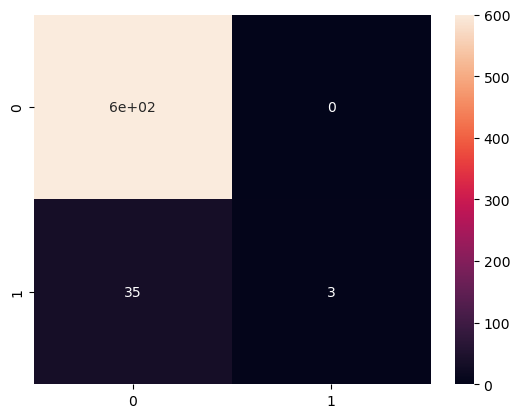

In [249]:
confusion_matrix = evaluation_metrics.cm()

In [253]:
classification_report = evaluation_metrics.classification_rep()
print(classification_report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       600
           1       1.00      0.08      0.15        38

    accuracy                           0.95       638
   macro avg       0.97      0.54      0.56       638
weighted avg       0.95      0.95      0.92       638



In [254]:
accuracy = evaluation_metrics.model_accuracy()
print(accuracy)

The accuracy of the model is 94.5141065830721


In [259]:
cnn.save('bone_feature.h5')

# BONE FRACTURE CLASSIFICATION

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


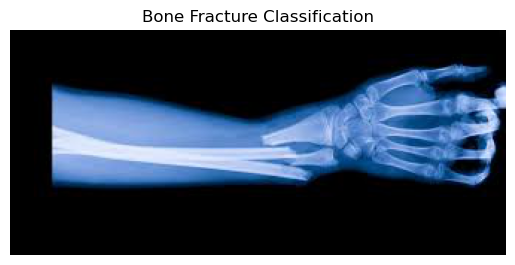

The image provided is FRACTURED


In [279]:
from keras.preprocessing import image

image_path = 'D:/ML PROJECTS\Bone fracture classification using cnn/bone_fracture.jpeg'

new_image = image.load_img(image_path, target_size=(128,128,3))

new_image = image.img_to_array(new_image)
new_image = np.expand_dims(new_image, axis=0)
new_image = new_image / 255.0

prediction = cnn.predict(new_image)

plt.imshow(image.load_img(image_path))
plt.title("Bone Fracture Classification")
plt.axis('off')
plt.show()

if prediction[0][0] == 0:
  print("The image provided is FRACTURED")
else:
  print("The image provided is NORMAL")